# Setup dataset

In [ ]:
# Set up
! pip install -q kaggle
! curl -o kaggle.json https://storage.googleapis.com/dataset-ml-zharif/kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    71  100    71    0     0     55      0  0:00:01  0:00:01 --:--:--    55
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d nayanack/shipping
! unzip -q shipping

Dataset URL: https://www.kaggle.com/datasets/nayanack/shipping
License(s): CC0-1.0
shipping.zip: Skipping, found more recently modified local copy (use --force to force download)
replace shipping.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = pd.read_csv('shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# EDA

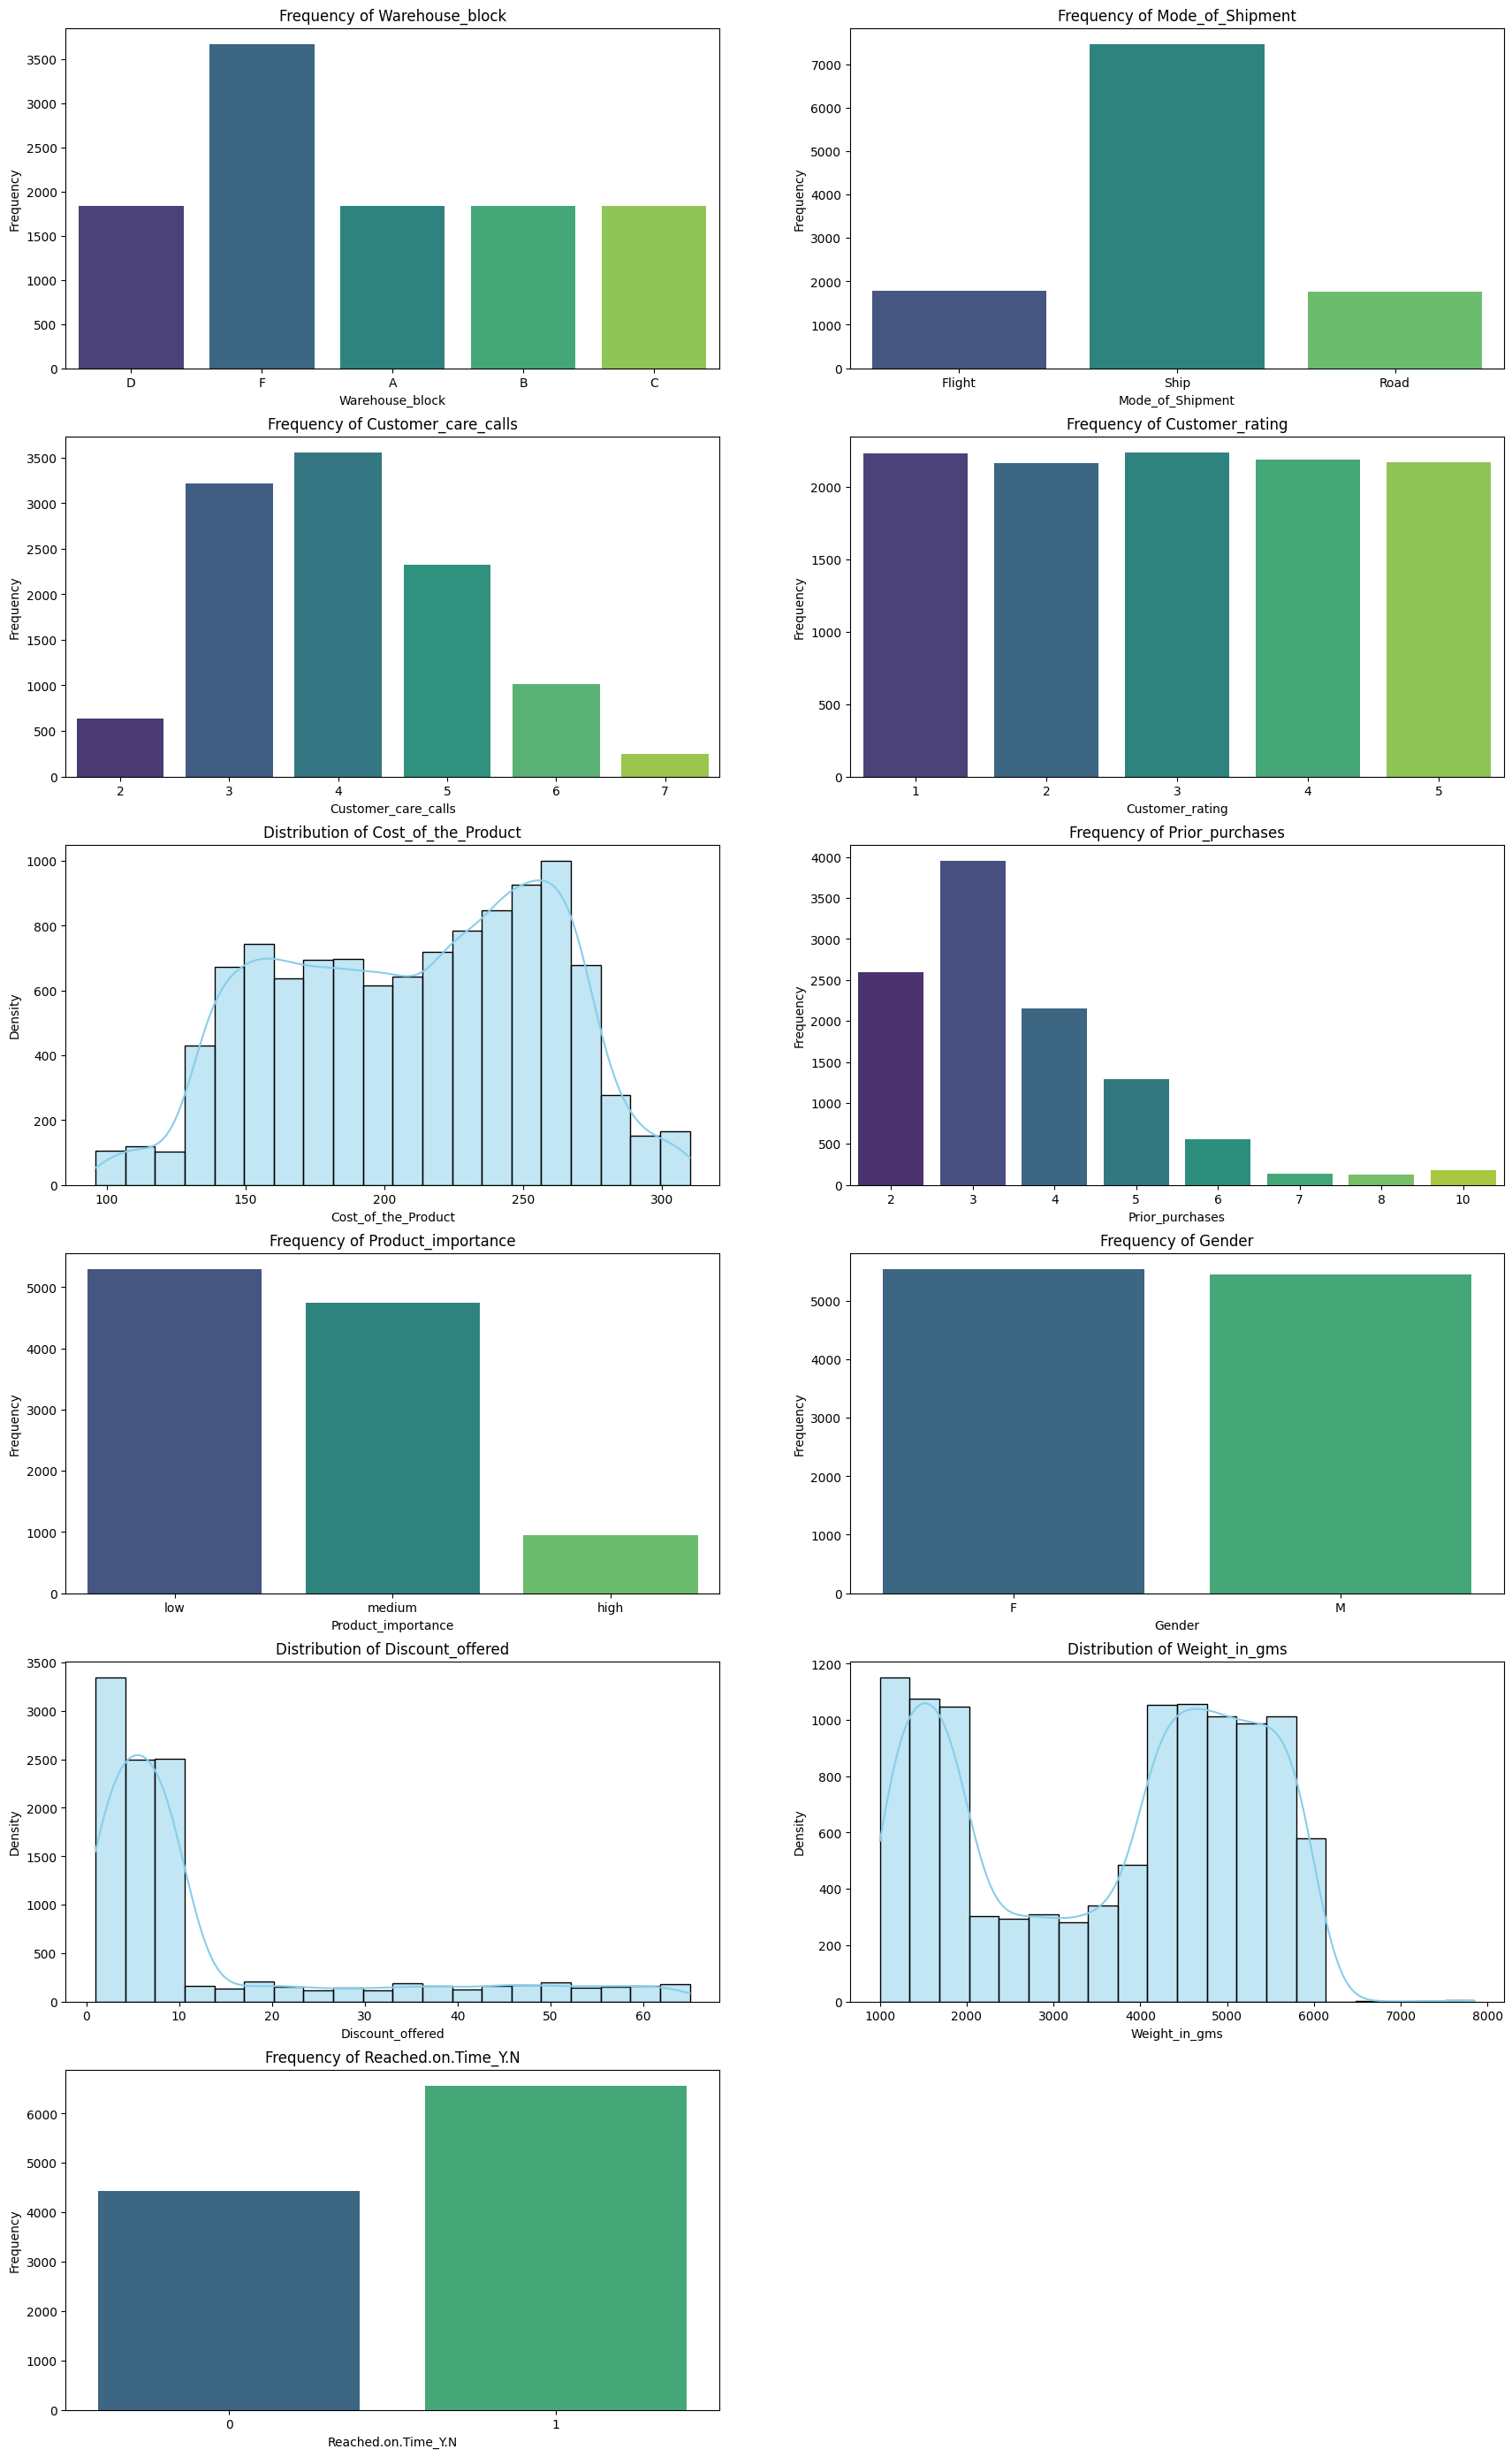

In [5]:
# Loop through each column
plt.figure(figsize=(21, 35))
n = 0
for column in df.columns:
    if column == 'ID' :
        continue
    n += 1
    plt.subplot(6,2,n)
    # Check if the column is numerical (continuous or discrete)
    if column in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'] :
        # For continuous data, create a density plot
        sns.histplot(df[column], kde=True, color='skyblue', bins=20)
        plt.title('Distribution of ' + column)
        plt.xlabel(column)
        plt.ylabel('Density')
    else:
        # For discrete data, create a count plot
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title('Frequency of ' + column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## Data Correlation

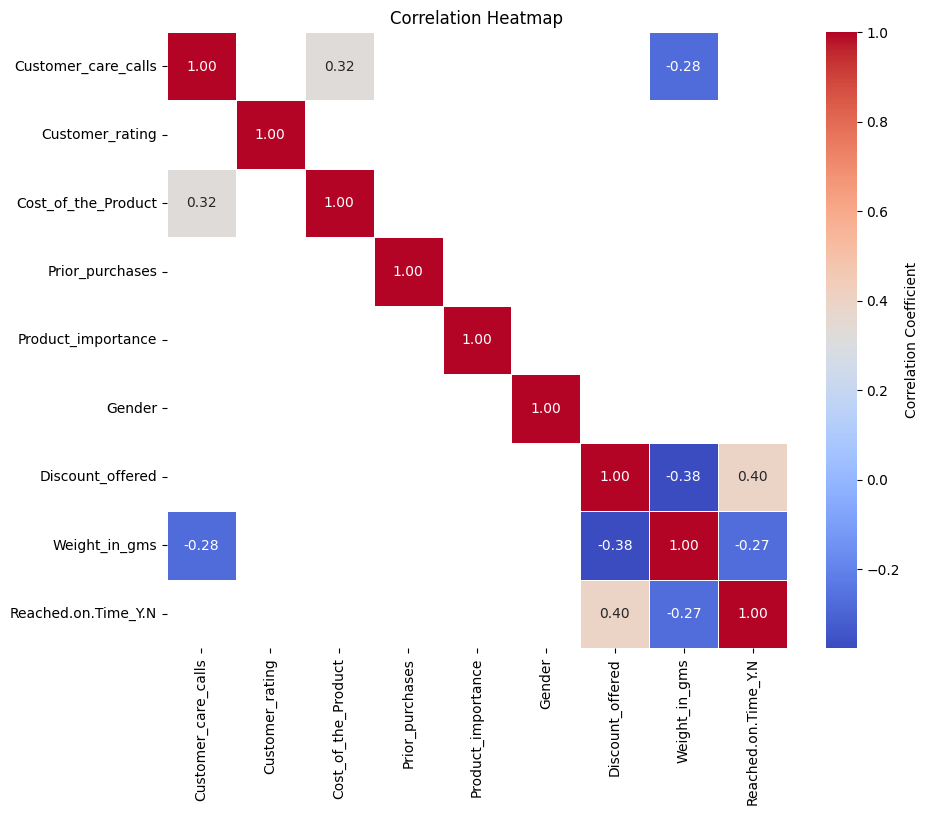

In [7]:
# Select all columns starting from the fourth column
df_corr = df.iloc[:, 3:]

# Replace categorical values with numerical values
df_corr['Gender'] = df_corr['Gender'].replace({'F': 0, 'M': 1})
df_corr['Product_importance'] = df_corr['Product_importance'].replace({'low': 1, 'medium': 2, 'high': 3})

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Apply threshold
threshold = 0.25
mask = np.abs(corr_matrix) < threshold
corr_matrix[mask] = np.nan

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.show()

## Percentage of On-Time Deliveries

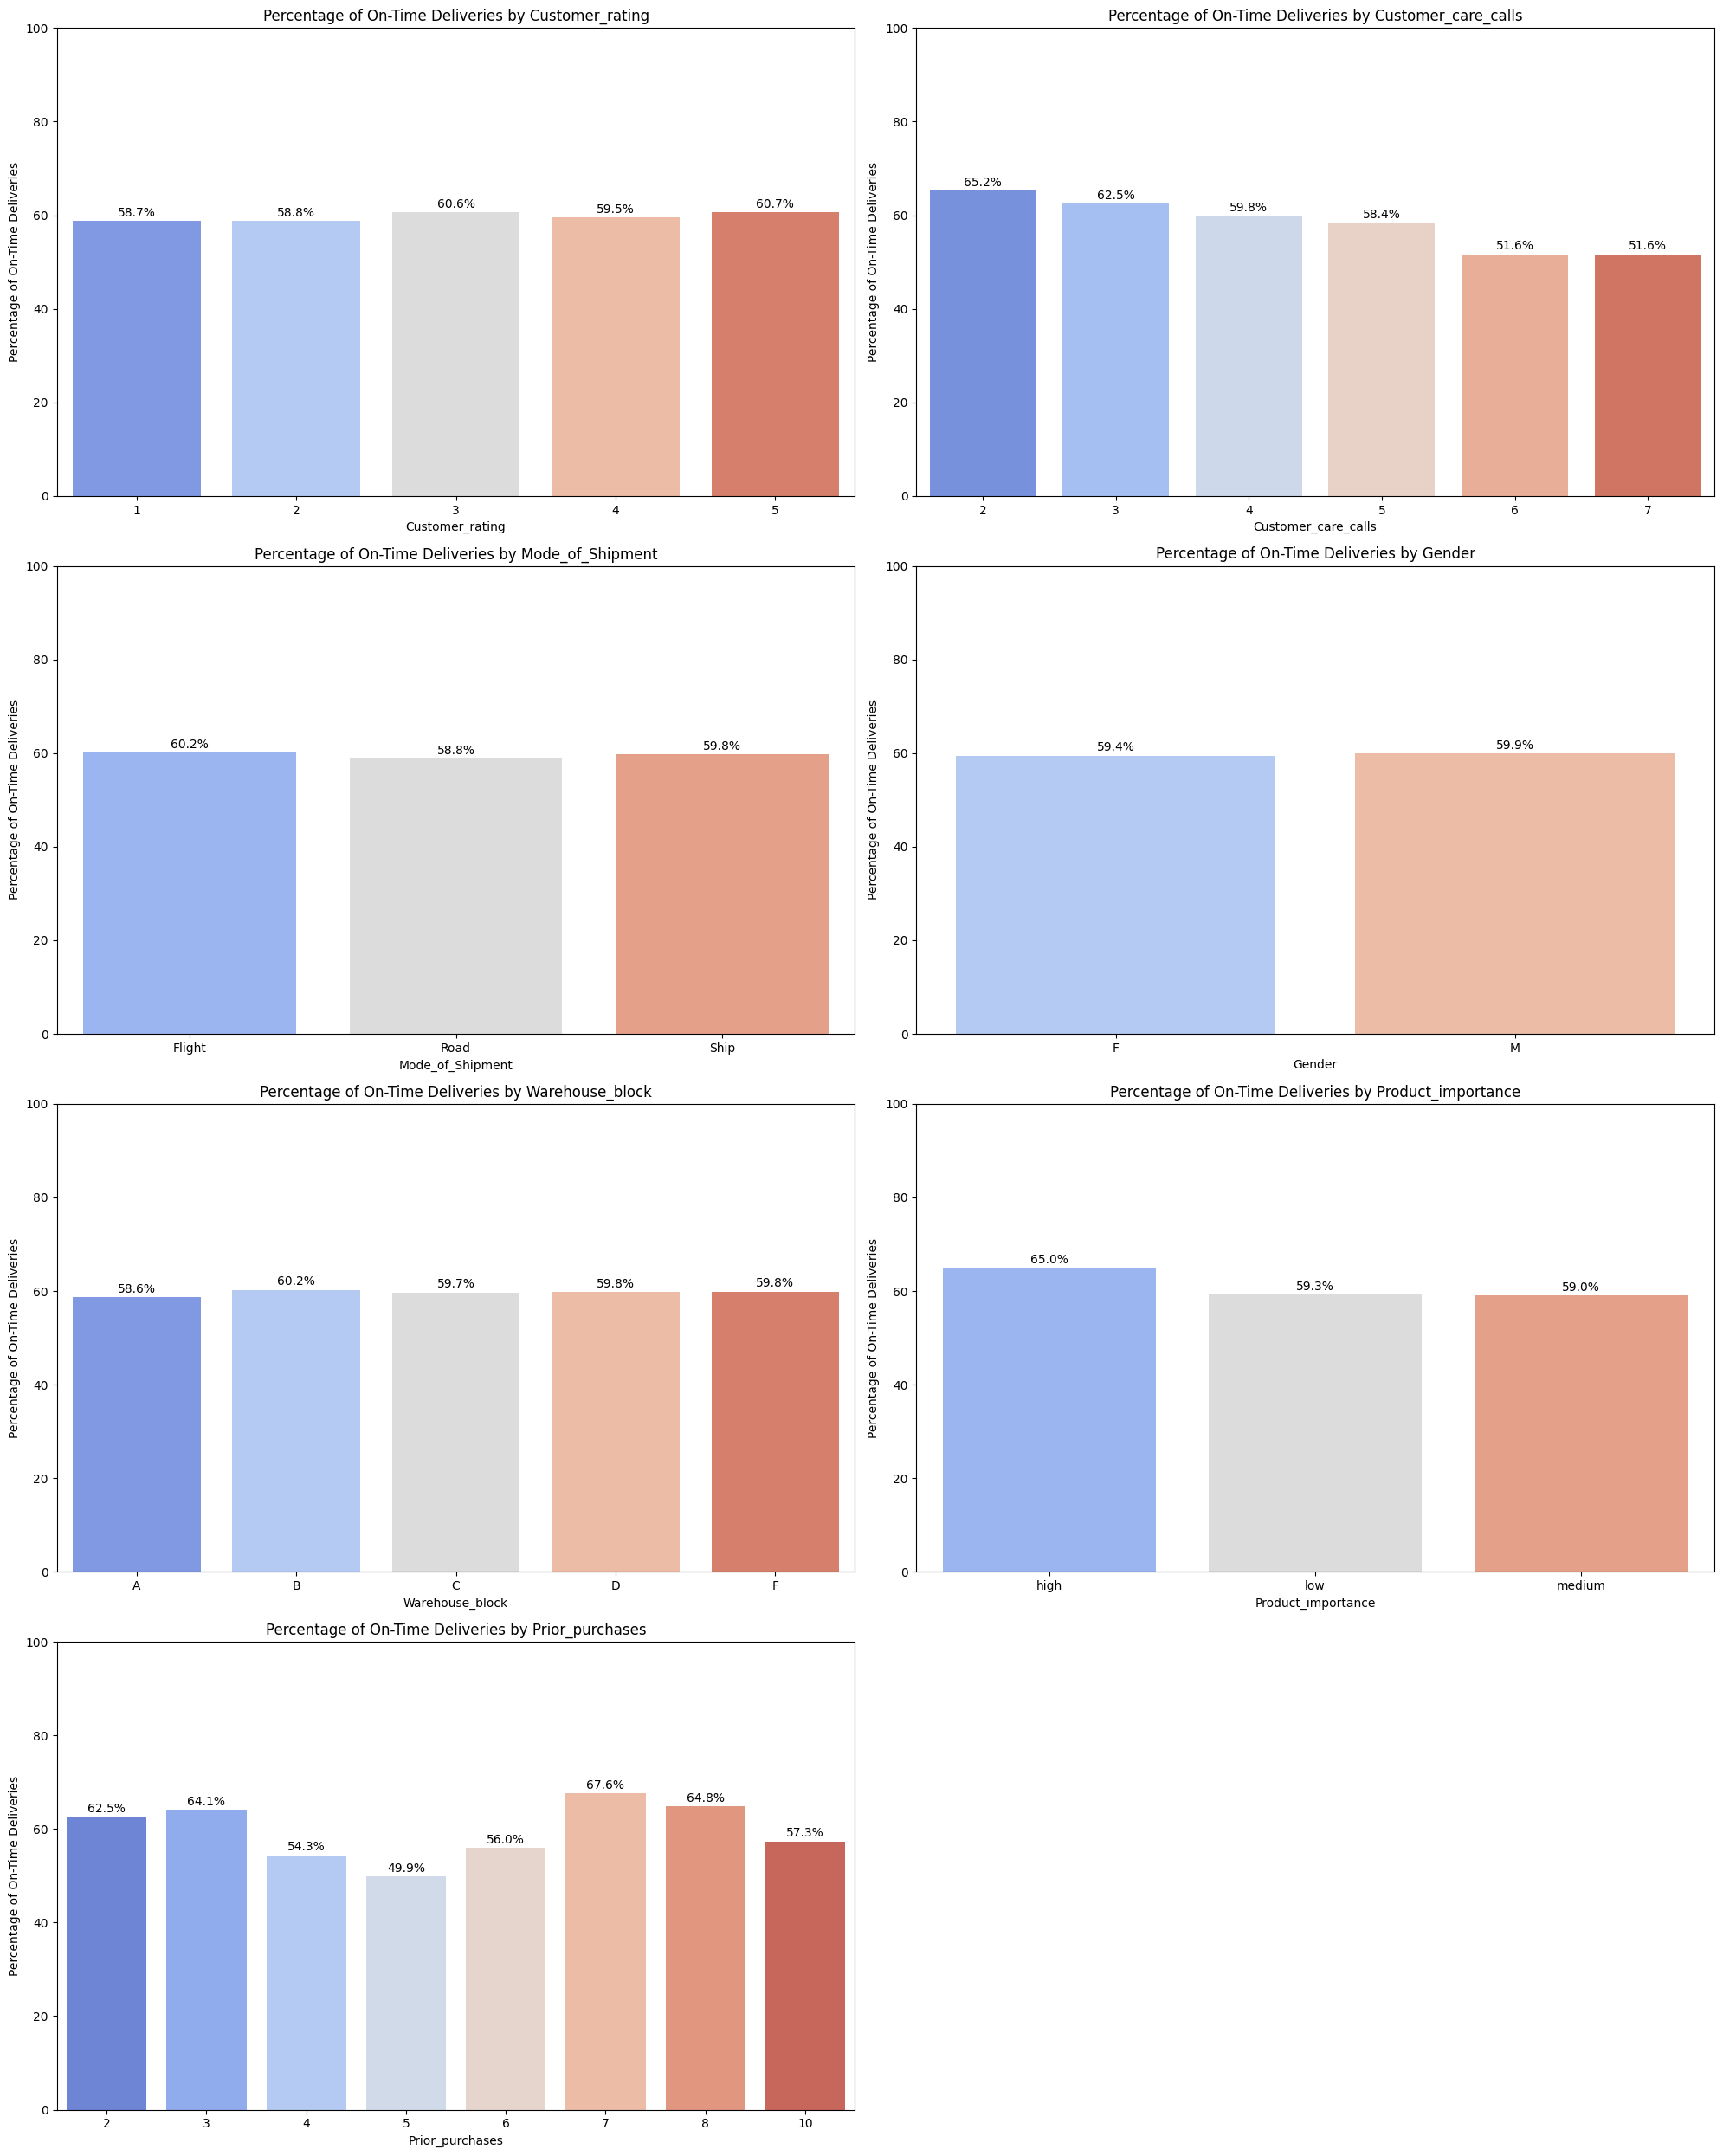

In [8]:
columns = ['Customer_rating','Customer_care_calls', 'Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Product_importance', 'Prior_purchases']
plt.figure(figsize=(20, 25))
n = 0

for column in columns:
    n += 1
    plt.subplot(4, 2, n)

    # Calculate the percentage of on-time deliveries for each column category
    percentage_on_time = df.groupby(column)['Reached.on.Time_Y.N'].mean() * 100

    # Reset index to make it easier to plot
    percentage_on_time = percentage_on_time.reset_index()

    # Create a bar plot
    sns.barplot(x=column, y='Reached.on.Time_Y.N', data=percentage_on_time, palette='coolwarm')

    # Add labels and title
    plt.title(f'Percentage of On-Time Deliveries by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage of On-Time Deliveries')
    plt.ylim(0, 100)  # Set y-axis limit to 100 for percentage

    # Add data labels on the bars
    for index, row in percentage_on_time.iterrows():
        plt.text(index, row['Reached.on.Time_Y.N'] + 1, f"{row['Reached.on.Time_Y.N']:.1f}%", ha='center')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


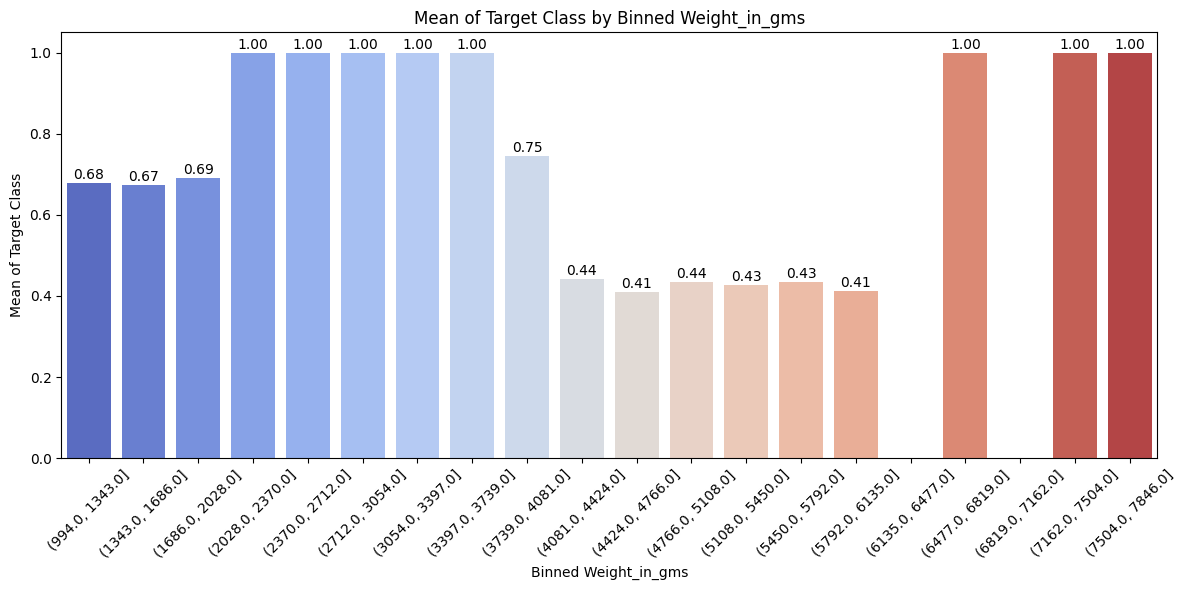

In [9]:
# Define the continuous variable and the number of bins
continuous_variable = 'Weight_in_gms'
num_bins = 20  # Define the number of bins for discretization

# Bin the continuous variable into intervals
df['bins'] = pd.cut(df[continuous_variable], bins=num_bins, precision=0)

# Calculate the mean of the target class for each bin
mean_target_by_bin = df.groupby('bins')['Reached.on.Time_Y.N'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='bins', y='Reached.on.Time_Y.N', data=mean_target_by_bin, palette='coolwarm')

# Add labels and title
plt.title('Mean of Target Class by Binned Weight_in_gms')
plt.xlabel('Binned Weight_in_gms')
plt.ylabel('Mean of Target Class')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels on the bars
for index, row in mean_target_by_bin.iterrows():
    plt.text(index, row['Reached.on.Time_Y.N'] + 0.01, f"{row['Reached.on.Time_Y.N']:.2f}", ha='center')

plt.tight_layout()
plt.show()

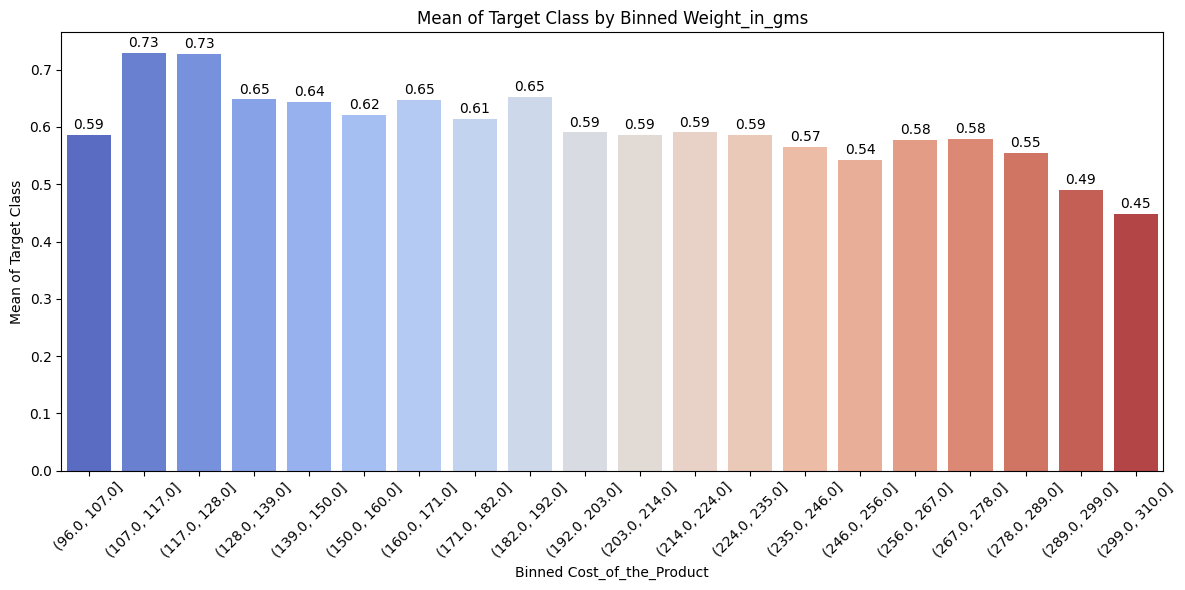

In [10]:
# Define the continuous variable and the number of bins
continuous_variable = 'Cost_of_the_Product'
num_bins = 20  # Define the number of bins for discretization

# Bin the continuous variable into intervals
df['bins'] = pd.cut(df[continuous_variable], bins=num_bins, precision=0)

# Calculate the mean of the target class for each bin
mean_target_by_bin = df.groupby('bins')['Reached.on.Time_Y.N'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='bins', y='Reached.on.Time_Y.N', data=mean_target_by_bin, palette='coolwarm')

# Add labels and title
plt.title('Mean of Target Class by Binned Weight_in_gms')
plt.xlabel('Binned Cost_of_the_Product')
plt.ylabel('Mean of Target Class')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels on the bars
for index, row in mean_target_by_bin.iterrows():
    plt.text(index, row['Reached.on.Time_Y.N'] + 0.01, f"{row['Reached.on.Time_Y.N']:.2f}", ha='center')

plt.tight_layout()
plt.show()

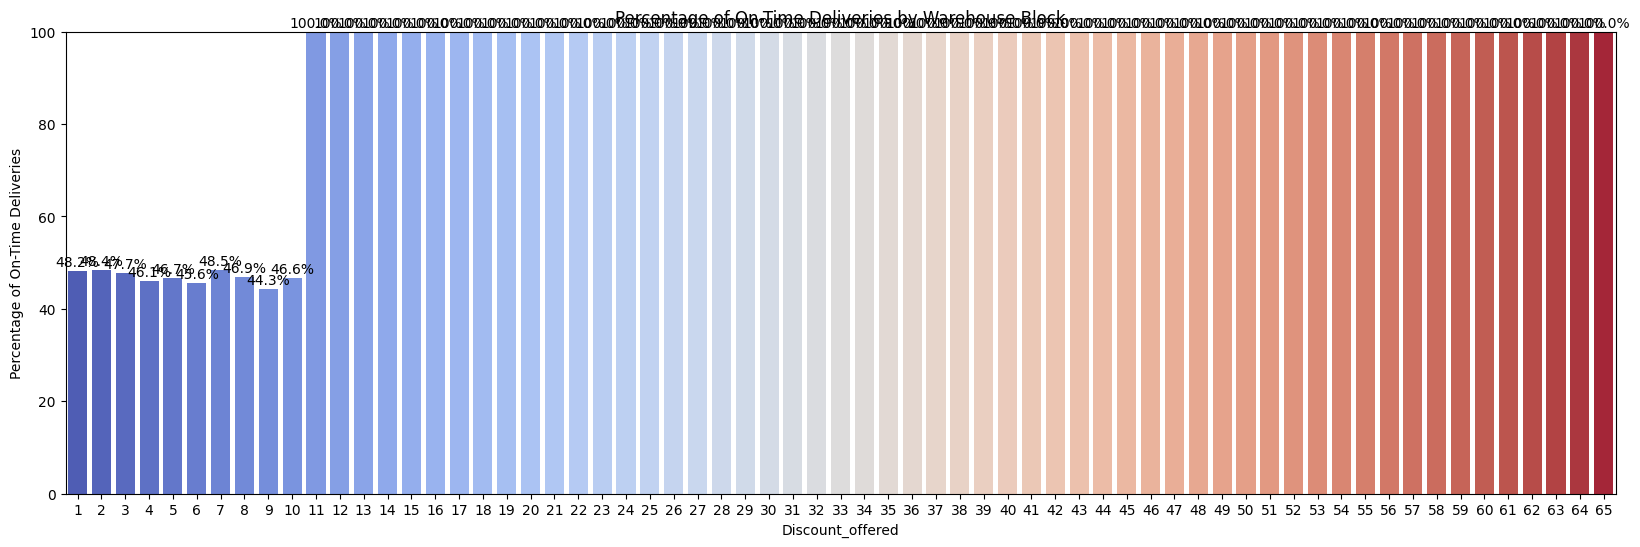

In [11]:
# Calculate the percentage of on-time deliveries for each warehouse block
percentage_on_time = df.groupby('Discount_offered')['Reached.on.Time_Y.N'].mean() * 100

# Reset index to make it easier to plot
percentage_on_time = percentage_on_time.reset_index()

# Create a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Discount_offered', y='Reached.on.Time_Y.N', data=percentage_on_time, palette='coolwarm')

# Add labels and title
plt.title('Percentage of On-Time Deliveries by Warehouse Block')
plt.xlabel('Discount_offered')
plt.ylabel('Percentage of On-Time Deliveries')
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentage

# Add data labels on the bars
for index, row in percentage_on_time.iterrows():
    plt.text(index, row['Reached.on.Time_Y.N'] + 1, f"{row['Reached.on.Time_Y.N']:.1f}%", ha='center')

plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10999 non-null  int64   
 1   Warehouse_block      10999 non-null  object  
 2   Mode_of_Shipment     10999 non-null  object  
 3   Customer_care_calls  10999 non-null  int64   
 4   Customer_rating      10999 non-null  int64   
 5   Cost_of_the_Product  10999 non-null  int64   
 6   Prior_purchases      10999 non-null  int64   
 7   Product_importance   10999 non-null  object  
 8   Gender               10999 non-null  object  
 9   Discount_offered     10999 non-null  int64   
 10  Weight_in_gms        10999 non-null  int64   
 11  Reached.on.Time_Y.N  10999 non-null  int64   
 12  bins                 10999 non-null  category
dtypes: category(1), int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
X = df.iloc[:,[3,5,6,7,9,10]]
X.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,4,177,3,low,44,1233
1,4,216,2,low,59,3088
2,2,183,4,low,48,3374
3,3,176,4,medium,10,1177
4,2,184,3,medium,46,2484


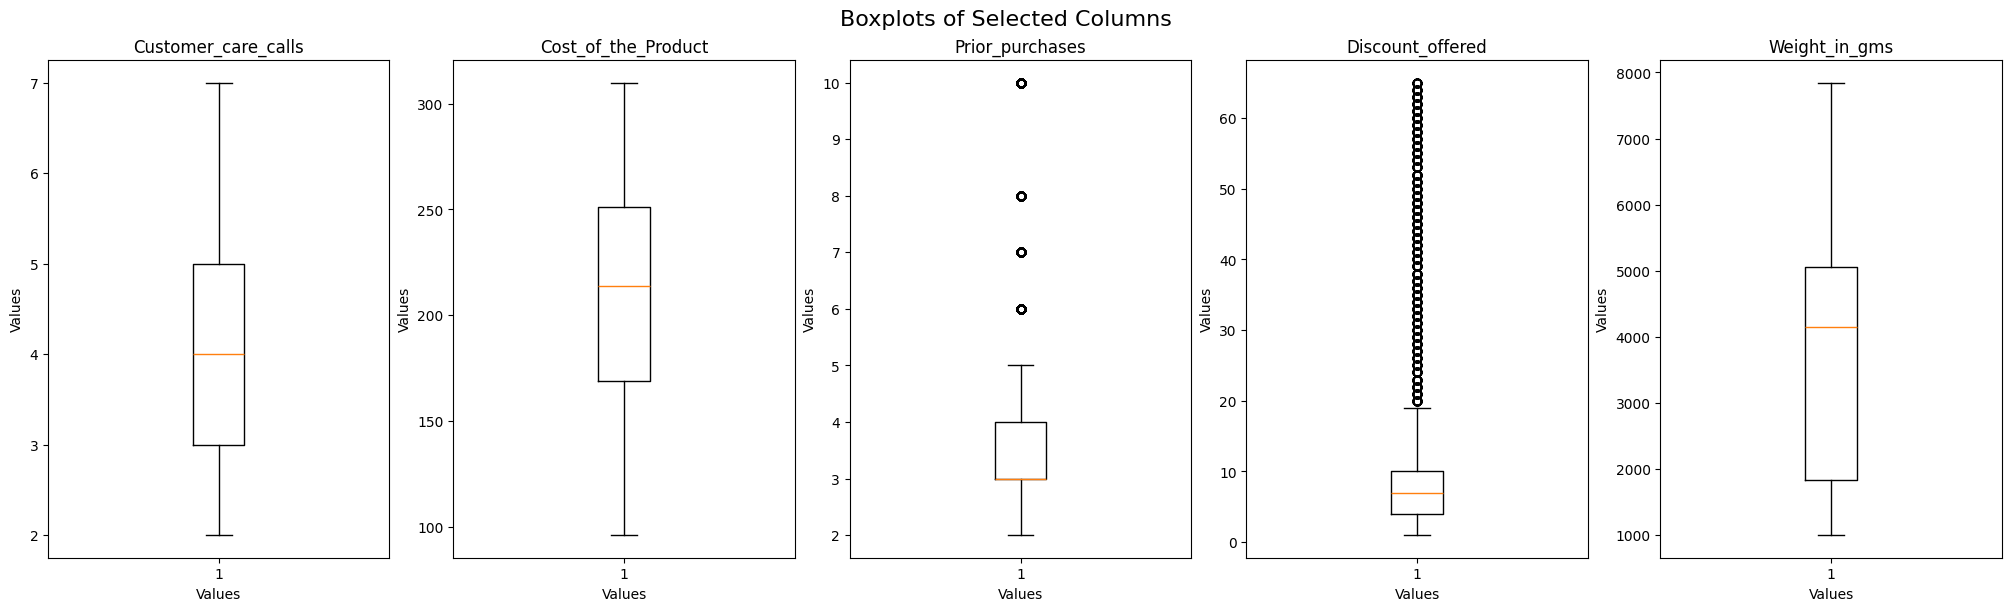

In [14]:
numeric_columns = X.select_dtypes(include=['number']).columns

# Number of numeric columns to plot
num_columns = len(numeric_columns)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 6), constrained_layout=True)

# Plot each boxplot
for i, column in enumerate(numeric_columns):
    axs[i].boxplot(X[column].dropna())  # Drop NaN values for plotting
    axs[i].set_title(column)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Values')

# Set the overall title for the figure
fig.suptitle('Boxplots of Selected Columns', fontsize=16)

plt.show()

In [15]:
# Select numeric columns
numeric_cols = X.iloc[:,[2,4]]

# Calculate outliers for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Filter rows with outliers
outliers_rows = outliers.any(axis=1)
outliers_data = X[outliers_rows]

# Display outlier rows
print(outliers_data)

       Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
0                        4                  177                3   
1                        4                  216                2   
2                        2                  183                4   
4                        2                  184                3   
7                        4                  233                2   
...                    ...                  ...              ...   
10981                    5                  251                6   
10983                    4                  229                6   
10990                    5                  219                6   
10993                    5                  257                6   
10997                    5                  223                6   

      Product_importance  Discount_offered  Weight_in_gms  
0                    low                44           1233  
1                    low                59           3088  
2  

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10999 non-null  int64 
 1   Cost_of_the_Product  10999 non-null  int64 
 2   Prior_purchases      10999 non-null  int64 
 3   Product_importance   10999 non-null  object
 4   Discount_offered     10999 non-null  int64 
 5   Weight_in_gms        10999 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 515.7+ KB


# KNN

## With Feature Selection

In [17]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,[3,5,6,7,9,10]]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.iloc[:,[3]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.iloc[:,[0,1,2,4,5]]
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()


,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.0,-0.451220,0.0,1,6.166667,-0.908270
1,0.0,0.024390,-1.0,1,8.666667,-0.330478
2,-1.0,-0.378049,1.0,1,6.833333,-0.241395
3,-0.5,-0.463415,1.0,2,0.500000,-0.925713
4,-1.0,-0.365854,0.0,2,6.500000,-0.518611


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6460606060606061
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1312
           1       0.72      0.67      0.70      1988

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 9, 11, 12, 15, 19],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.6496969696969697
              precision    recall  f1-score   support

           0       0.54      0.75      0.63      1312
           1       0.78      0.59      0.67      1988

    accuracy                           0.65      3300
   macro avg       0.66      0.67      0.65      3300
weighted avg       0.68      0.65      0.65      3300



## Without feature selection

In [20]:
# from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,1:11]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.select_dtypes(include=['number'])
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.000000,-2.0,0.0,-0.5,-0.451220,0.0,0.0,0.0,6.166667,-0.908270
1,0.333333,-2.0,0.0,1.0,0.024390,-1.0,0.0,1.0,8.666667,-0.330478
2,-1.000000,-2.0,-1.0,-0.5,-0.378049,1.0,0.0,1.0,6.833333,-0.241395
3,-0.666667,-2.0,-0.5,0.0,-0.463415,1.0,1.0,1.0,0.500000,-0.925713
4,-0.333333,-2.0,-1.0,-0.5,-0.365854,0.0,1.0,0.0,6.500000,-0.518611


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 11, 15, 19],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Accuracy: 0.6384848484848484
              precision    recall  f1-score   support

           0       0.54      0.68      0.60      1312
           1       0.74      0.61      0.67      1988

    accuracy                           0.64      3300
   macro avg       0.64      0.65      0.63      3300
weighted avg       0.66      0.64      0.64      3300



# Decision Tree

## With Feature Selection

In [22]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,[3,5,6,7,9,10]]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.iloc[:,[3]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.iloc[:,[0,1,2,4,5]]
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.0,-0.451220,0.0,1,6.166667,-0.908270
1,0.0,0.024390,-1.0,1,8.666667,-0.330478
2,-1.0,-0.378049,1.0,1,6.833333,-0.241395
3,-0.5,-0.463415,1.0,2,0.500000,-0.925713
4,-1.0,-0.365854,0.0,2,6.500000,-0.518611


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6487878787878788
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1312
           1       0.71      0.71      0.71      1988

    accuracy                           0.65      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.65      0.65      3300



### Hyperparameter tuning

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6851515151515152
              precision    recall  f1-score   support

           0       0.56      0.92      0.70      1312
           1       0.91      0.53      0.67      1988

    accuracy                           0.69      3300
   macro avg       0.74      0.73      0.68      3300
weighted avg       0.77      0.69      0.68      3300



## Without feature selection

In [25]:
# from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,1:11]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.select_dtypes(include=['number'])
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.000000,-2.0,0.0,-0.5,-0.451220,0.0,0.0,0.0,6.166667,-0.908270
1,0.333333,-2.0,0.0,1.0,0.024390,-1.0,0.0,1.0,8.666667,-0.330478
2,-1.000000,-2.0,-1.0,-0.5,-0.378049,1.0,0.0,1.0,6.833333,-0.241395
3,-0.666667,-2.0,-0.5,0.0,-0.463415,1.0,1.0,1.0,0.500000,-0.925713
4,-0.333333,-2.0,-1.0,-0.5,-0.365854,0.0,1.0,0.0,6.500000,-0.518611


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6384848484848484
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1312
           1       0.70      0.70      0.70      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.64      0.64      3300



### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6848484848484848
              precision    recall  f1-score   support

           0       0.56      0.92      0.70      1312
           1       0.91      0.53      0.67      1988

    accuracy                           0.68      3300
   macro avg       0.74      0.72      0.68      3300
weighted avg       0.77      0.68      0.68      3300



# Naive Bayes

## With Feature Selection

In [28]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,[3,5,6,7,9,10]]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.iloc[:,[3]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
# numeric_cols = X.iloc[:,[0,1,2,4,5]]
# scaler = RobustScaler()
# X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,4,177,3,1,44,1233
1,4,216,2,1,59,3088
2,2,183,4,1,48,3374
3,3,176,4,2,10,1177
4,2,184,3,2,46,2484


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your binary target variable

# List of Naive Bayes classifiers
nb_classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB()
]

# Dictionary to store accuracies
accuracies = {}

# Iterate over each classifier
for nb_classifier in nb_classifiers:
    # Perform cross-validation to get accuracy scores
    scores = cross_val_score(nb_classifier, X, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store mean accuracy in the dictionary
    classifier_name = type(nb_classifier).__name__
    accuracies[classifier_name] = mean_accuracy

# Print accuracies
for classifier, accuracy in accuracies.items():
    print(f"{classifier}: Accuracy = {accuracy:.4f}")


GaussianNB: Accuracy = 0.6452
MultinomialNB: Accuracy = 0.6604
BernoulliNB: Accuracy = 0.5967


### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your binary target variable

# Define parameters grid for MultinomialNB
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# List of Naive Bayes classifiers
nb_classifiers = [
    GaussianNB(),
    GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=5),
    BernoulliNB()
]

# Dictionary to store accuracies
accuracies = {}

# Iterate over each classifier
for nb_classifier in nb_classifiers:
    if isinstance(nb_classifier, GridSearchCV):
        # For MultinomialNB, use GridSearchCV to tune hyperparameters
        nb_classifier.fit(X, y)
        best_params = nb_classifier.best_params_
        best_nb_classifier = MultinomialNB(**best_params)
    else:
        best_nb_classifier = nb_classifier

    # Perform cross-validation to get accuracy scores
    scores = cross_val_score(best_nb_classifier, X, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store mean accuracy in the dictionary
    classifier_name = type(best_nb_classifier).__name__
    accuracies[classifier_name] = mean_accuracy

# Print accuracies
for classifier, accuracy in accuracies.items():
    print(f"{classifier}: Accuracy = {accuracy:.4f}")


GaussianNB: Accuracy = 0.6452
MultinomialNB: Accuracy = 0.6604
BernoulliNB: Accuracy = 0.5967


## Without feature selection

In [31]:
# from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,1:11]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Display the preprocessed DataFrame
X.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233
1,4,0,4,5,216,2,1,1,59,3088
2,0,0,2,2,183,4,1,1,48,3374
3,1,0,3,3,176,4,2,1,10,1177
4,2,0,2,2,184,3,2,0,46,2484


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your binary target variable

# List of Naive Bayes classifiers
nb_classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB()
]

# Dictionary to store accuracies
accuracies = {}

# Iterate over each classifier
for nb_classifier in nb_classifiers:
    # Perform cross-validation to get accuracy scores
    scores = cross_val_score(nb_classifier, X, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store mean accuracy in the dictionary
    classifier_name = type(nb_classifier).__name__
    accuracies[classifier_name] = mean_accuracy

# Print accuracies
for classifier, accuracy in accuracies.items():
    print(f"{classifier}: Accuracy = {accuracy:.4f}")


GaussianNB: Accuracy = 0.6450
MultinomialNB: Accuracy = 0.6608
BernoulliNB: Accuracy = 0.5967


### Hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your binary target variable

# Define parameters grid for MultinomialNB
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# List of Naive Bayes classifiers
nb_classifiers = [
    GaussianNB(),
    GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=5),
    BernoulliNB()
]

# Dictionary to store accuracies
accuracies = {}

# Iterate over each classifier
for nb_classifier in nb_classifiers:
    if isinstance(nb_classifier, GridSearchCV):
        # For MultinomialNB, use GridSearchCV to tune hyperparameters
        nb_classifier.fit(X, y)
        best_params = nb_classifier.best_params_
        best_nb_classifier = MultinomialNB(**best_params)
    else:
        best_nb_classifier = nb_classifier

    # Perform cross-validation to get accuracy scores
    scores = cross_val_score(best_nb_classifier, X, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store mean accuracy in the dictionary
    classifier_name = type(best_nb_classifier).__name__
    accuracies[classifier_name] = mean_accuracy

# Print accuracies
for classifier, accuracy in accuracies.items():
    print(f"{classifier}: Accuracy = {accuracy:.4f}")


GaussianNB: Accuracy = 0.6450
MultinomialNB: Accuracy = 0.6608
BernoulliNB: Accuracy = 0.5967


# SVM

In [34]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,[3,5,6,7,9,10]]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.iloc[:,[3]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.iloc[:,[0,1,2,4,5]]
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.0,-0.451220,0.0,1,6.166667,-0.908270
1,0.0,0.024390,-1.0,1,8.666667,-0.330478
2,-1.0,-0.378049,1.0,1,6.833333,-0.241395
3,-0.5,-0.463415,1.0,2,0.500000,-0.925713
4,-1.0,-0.365854,0.0,2,6.500000,-0.518611


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of SVM classifiers
svm_classifiers = [
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf')
]

# Dictionary to store accuracies
accuracies = {}

# Iterate over each SVM classifier
for svm_classifier in svm_classifiers:
    # Train the SVM classifier
    svm_classifier.fit(X_train, y_train)

    # Evaluate the classifier using cross-validation
    scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store mean accuracy in the dictionary
    classifier_name = type(svm_classifier).__name__ + f"_{svm_classifier.kernel}"
    accuracies[classifier_name] = mean_accuracy

# Print accuracies
for classifier, accuracy in accuracies.items():
    print(f"{classifier}: Accuracy = {accuracy:.4f}")

# Optionally, evaluate on the test set
for svm_classifier in svm_classifiers:
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{type(svm_classifier).__name__} ({svm_classifier.kernel}) Test Accuracy: {accuracy:.4f}")


SVC_linear: Accuracy = 0.6598
SVC_poly: Accuracy = 0.6518
SVC_rbf: Accuracy = 0.6709
SVC (linear) Test Accuracy: 0.6682
SVC (poly) Test Accuracy: 0.6512
SVC (rbf) Test Accuracy: 0.6661


### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of SVM classifiers with parameter grids for hyperparameter tuning
svm_classifiers = [
    (SVC(kernel='linear'), {'C': [0.1, 1, 10]}),  # Linear SVM with different C values
    (SVC(kernel='poly'), {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}),  # Polynomial SVM with different C and degree values
    (SVC(kernel='rbf'), {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})  # RBF SVM with different C and gamma values
]

# Dictionary to store best parameters and accuracies
best_params_and_accuracies = {}

# Iterate over each SVM classifier
for svm_classifier, param_grid in svm_classifiers:
    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding mean cross-validated accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # Store the best parameters and accuracy in the dictionary
    classifier_name = type(svm_classifier).__name__ + f"_{svm_classifier.kernel}"
    best_params_and_accuracies[classifier_name] = {'best_params': best_params, 'best_accuracy': best_accuracy}

# Print best parameters and accuracies
for classifier, params_and_accuracy in best_params_and_accuracies.items():
    best_params = params_and_accuracy['best_params']
    best_accuracy = params_and_accuracy['best_accuracy']
    print(f"{classifier}: Best Parameters = {best_params}, Best Accuracy = {best_accuracy:.4f}")


SVC_linear: Best Parameters = {'C': 1}, Best Accuracy = 0.6598
SVC_poly: Best Parameters = {'C': 10, 'degree': 3}, Best Accuracy = 0.6615
SVC_rbf: Best Parameters = {'C': 0.1, 'gamma': 0.1}, Best Accuracy = 0.6713


# ANN

## With Feature Selection

In [44]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,[3,5,6,7,9,10]]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.iloc[:,[3]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.iloc[:,[0,1,2,4,5]]
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.0,-0.451220,0.0,1,6.166667,-0.908270
1,0.0,0.024390,-1.0,1,8.666667,-0.330478
2,-1.0,-0.378049,1.0,1,6.833333,-0.241395
3,-0.5,-0.463415,1.0,2,0.500000,-0.925713
4,-1.0,-0.365854,0.0,2,6.500000,-0.518611


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(units=1028, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.1))  # Add dropout layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6152 - loss: 0.5513
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6648 - loss: 0.5191
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6687 - loss: 0.5159
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6746 - loss: 0.5131
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6777 - loss: 0.5129
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6583 - loss: 0.5225
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6718 - loss: 0.5201
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6783 - loss: 0.5070
Epoch 9/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6726 - loss: 0.5141
Epoch 10/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6822 - loss: 0.5034
Epoch 11/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6880 - loss: 0.5087
Epoch 12/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

## Without feature selection

In [46]:
# from sklearn.preprocessing import RobustScaler, LabelEncoder

X = df.iloc[:,1:11]
y = df['Reached.on.Time_Y.N']
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize numeric columns using RobustScaler
numeric_cols = X.select_dtypes(include=['number'])
scaler = RobustScaler()
X[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display the preprocessed DataFrame
X.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.000000,-2.0,0.0,-0.5,-0.451220,0.0,0.0,0.0,6.166667,-0.908270
1,0.333333,-2.0,0.0,1.0,0.024390,-1.0,0.0,1.0,8.666667,-0.330478
2,-1.000000,-2.0,-1.0,-0.5,-0.378049,1.0,0.0,1.0,6.833333,-0.241395
3,-0.666667,-2.0,-0.5,0.0,-0.463415,1.0,1.0,1.0,0.500000,-0.925713
4,-0.333333,-2.0,-1.0,-0.5,-0.365854,0.0,1.0,0.0,6.500000,-0.518611


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Assuming X is your feature matrix and y is your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(units=1028, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))  # Add dropout layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.1))  # Add dropout layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6199 - loss: 0.5603
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6520 - loss: 0.5232
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6662 - loss: 0.5207
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6828 - loss: 0.5116
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6816 - loss: 0.5079
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6746 - loss: 0.5172
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6766 - loss: 0.5180
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6909 - loss: 0.5041
Epoch 9/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6796 - loss: 0.5109
Epoch 10/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6900 - loss: 0.5106
Epoch 11/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6773 - loss: 0.5108
Epoch 12/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

# Kesimpulan

Model paling optimal untuk melakukan klasifikasi ini adalah Decision Tree dengan hasil setelah hyperparameter tuning sebagai berikut

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 0.6851515151515152

              precision    recall  f1-score   support

           0       0.56      0.92      0.70      1312
           1       0.91      0.53      0.67      1988

    accuracy                           0.69      3300
    macro avg      0.74      0.73      0.68      3300
    weighted avg   0.77      0.69      0.68      3300
